# Лабораторна робота 2

Згенерувати N (наприклад, 50) тривимірних незалежних векторів, в яких всі координати незалежні,
перші дві показниково розподілені з параметром 1, третя має стандартний нормальний розподіл.
Реалізувати алгоритм Козинця пошуку розділяючого вектора з опуклої оболонки цих векторів.

In [1]:
import numpy as np

vect=np.column_stack([
    np.random.exponential(scale=1, size=(50, 1)),
    np.random.exponential(scale=1, size=(50, 1)),
    np.random.normal(size=(50, 1))])
print("shape:", vect.shape)
vect[:10]

shape: (50, 3)


array([[ 0.70072167,  2.0900001 , -1.20210122],
       [ 1.1443458 ,  0.79710345,  0.65985822],
       [ 1.42541025,  0.10065555, -0.19090414],
       [ 1.03273296,  0.20811664,  0.53254143],
       [ 0.89989136,  0.0355644 , -0.98108898],
       [ 0.63528011,  3.36943281,  0.75327289],
       [ 0.97252341,  0.66419955, -0.08879876],
       [ 1.90868779,  1.61354766, -0.7180228 ],
       [ 1.59976188,  0.39688488,  1.68220197],
       [ 1.77095379,  1.25454129,  0.25987799]])

In [2]:
from scipy.optimize import golden

def kozinets(x, at): 
    for j in range(0, x.shape[0]):
        scalar_mult = np.dot(x[j],at)
        
        if scalar_mult <= 0:            
            print("\nxj і aт мають скалярних добуток <= 0")
            print("j:", j)
            print("xj:", x[j])
            print("at:", at)
            xj = x[j]

            #Мінімізуємо вираз по к
            f = lambda k: np.linalg.norm((1-k)*at + k*xj)
            k = golden(f, full_output=True)[0]
            
#           визначаємо at1
            at1 = (1-k)*at+k*xj
            print("at1:", at1)
            
#           Далі рекурентно викликаємо для at1
#           Згідно теореми:
#           За скiнченну кiлькiсть крокiв алгоритм Козинця зупиняється i знаходить
#           вектор α, для якого minj∈J (α, xj) > 0.
            at = kozinets(x, at1)
    #Якщо  вектора х для якого скалярний добуток<=0 немає, то розв'язок задачі at.
    return at

In [3]:
roz_vect= kozinets(vect, vect[0])
print("\nРозділяючий вектор: ",roz_vect)


xj і aт мають скалярних добуток <= 0
j: 8
xj: [1.59976188 0.39688488 1.68220197]
at: [ 0.70072167  2.0900001  -1.20210122]
at1: [1.17863537 1.18997032 0.33114278]

Розділяючий вектор:  [1.17863537 1.18997032 0.33114278]


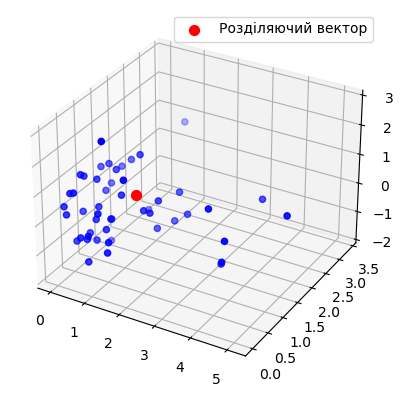

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

at = roz_vect

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(vect[:, 0], vect[:, 1], vect[:, 2], c='blue', marker='o')
ax.scatter(at[0], at[1], at[2], c='red', marker='o', s=50, label='Розділяючий вектор')  

ax.legend()
plt.show()